In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# 지도학습

## SVM

In [3]:
def contours2D(model, x1, x2, h=0.01, **params):
  xx1, xx2 = np.meshgrid(
    np.arange(x1.min() - 0.1, x1.max() + 0.1, h), 
    np.arange(x2.min() - 0.1 , x2.max() + 0.1 , h)
  )

  y = model.predict(np.c_[xx1.flatten(), xx2.flatten()])
  y = y.reshape(xx1.shape)
  result = plt.contourf(xx1, xx2, y, **params)
  return result

In [2]:
from sklearn import datasets

# Support Vector Machine
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC

### linear

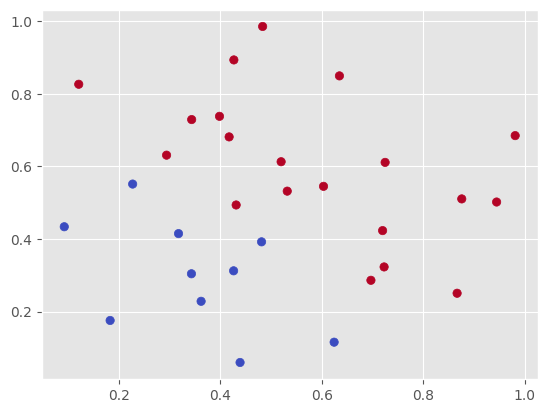

In [5]:
np.random.seed(123)
x = np.random.rand(30,2)
y = np.zeros(len(x))
y[-4/5 + 3/4 * x[:,0] + 1 * x[:,1] > 0] = 1

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.show()

#### 파라미터C에 따른 경계선의 변화
- C: 마진내에 포함될(허용) 오분류
- kernel: linear, poly, rbf(default)
- C는 결정경계를 정하는 파라미터 이고,
  - 마진 내의 오분류를 어느정도 허용할지에 대한 파라미터
  - C가 너무 작으면 오분류를 허용할 가능성이 놓고, 과소적합될 우려가 있습니다. 
  - C가 너무 크면, 오분류를 허용하지 않겠다는 뜻이고, 과적합될 가능성이 높습니다.
  - 적절한 C를 찾아야 합니다.

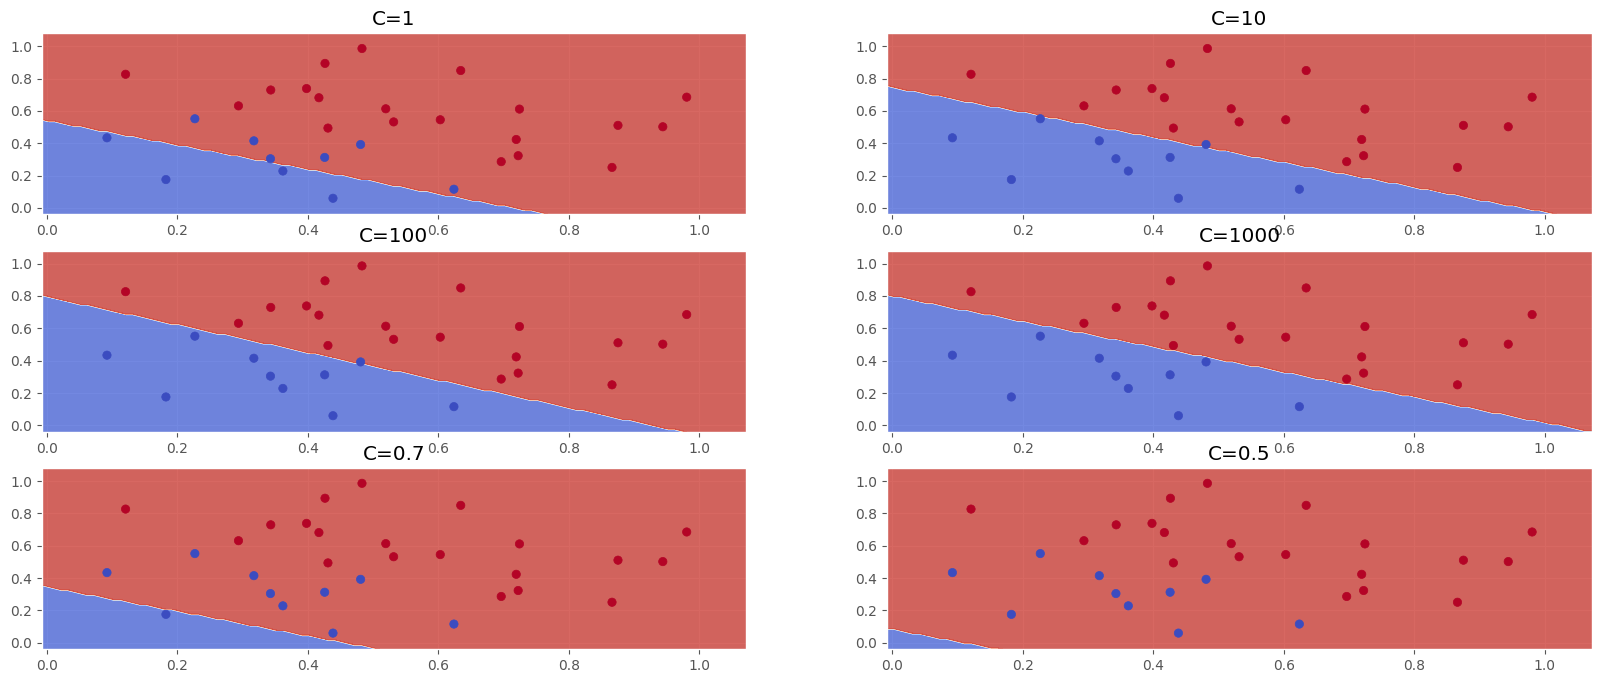

In [7]:
x1, x2 = x[:,0], x[:, 1]

plt.figure( figsize=(20, 8) )

plt.subplot(3, 2, 1)
model = SVC(kernel='linear', C=1).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=1')

plt.subplot(3, 2, 2)
model = SVC(kernel='linear', C=10).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=10')

plt.subplot(3, 2, 3)
model = SVC(kernel='linear', C=100).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=100')

plt.subplot(3, 2, 4)
model = SVC(kernel='linear', C=1000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=1000')

plt.subplot(3, 2, 5)
model = SVC(kernel='linear', C=0.7).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=0.7')

plt.subplot(3, 2, 6)
model = SVC(kernel='linear', C=0.5).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.title('C=0.5')

plt.show()

### Poly
- 일반적인 선형회귀에서는 차수를 늘려서 비선형 모형을 적합을 하게 되는데
- SVM은 어떠한 커널을 적용하느냐에 따라서 달라질 수 있습니다.

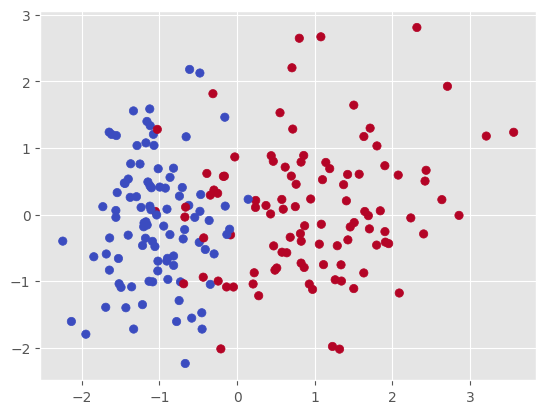

In [9]:
x, y = datasets.make_classification(
  n_samples=200, n_features=2, n_classes=2, random_state=20220214,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
)

x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.show()

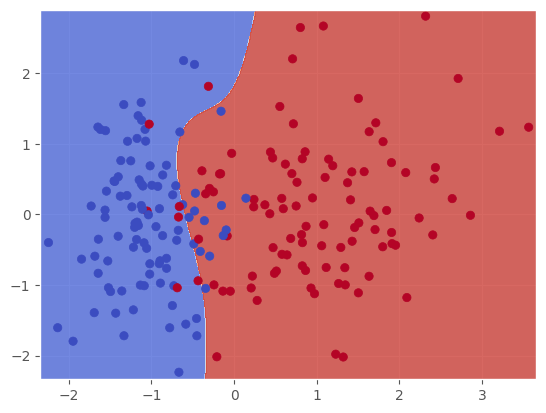

In [10]:
model = SVC(kernel='poly', C=1000000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

### Gaussian Kernel
- 비선형 모형을 찾기 위해서 저차원의 자료를 고차원을 변경
  - 샘플 예제에서는 2차원의 자료를 3차원으로 변환
  - 이 방법이 성능이 매우 뛰어납니다.
  - gamma: 곡률경계를 결정하는 파라미터

- 감마는 곡률경계를 결정하는 파라미터이고,
  - 감마가 작으면 곡률의 범위가 커지게 되고, 과소적합될 우려가 있습니다. 
  - 감마가 크면 곡률의 범위가 작아지게 되고, 자료를 완벽하게 하나하나의 곡률로 분류하려고 하면서, 과적합이 발생하게 될 우려가 있습니다.

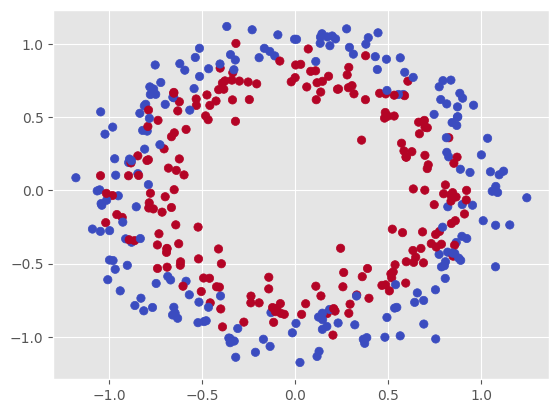

In [11]:
x, y = datasets.make_circles(n_samples=400, noise=0.1, random_state=410)
x1, x2 = x[:, 0], x[:, 1]
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm')
plt.show()

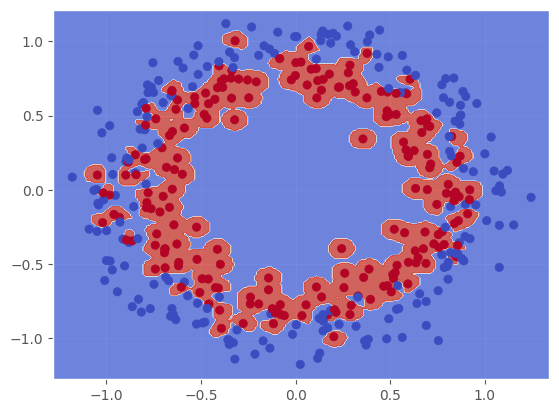

In [13]:
model = SVC(kernel='rbf', C=10, gamma=1000).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

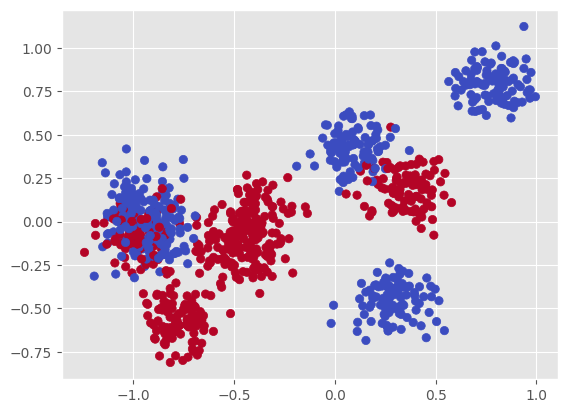

In [14]:
x, y = datasets.make_blobs( 
  n_samples=1000, center_box=(-1, 1), centers=10, cluster_std=0.1, random_state=3)
y %= 2

x1, x2 = x[:, 0], x[:, 1]
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')

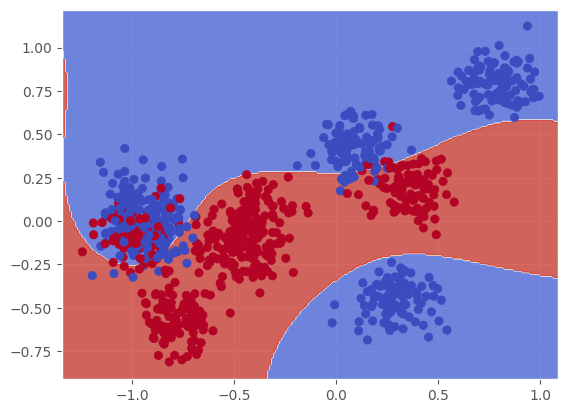

Bad pipe message: %s [b'+n\x01\xd2TM\xc9A\xadf\xe3\xabk\xc1}Q4\xa4 \x11\xb2\xe8\xd8\xa8Z\xbc~\xfbd\x13it\xb9\r\xe5\xdfgz\n\x8ce\xd8R\x99\xa4\x10\xd2\xecKB\x93\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00']
Bad pipe message: %s [b'$\x00\x1d\x00 \xc2\x92\xc4\x9dJ\n\xedw\xaa\xd0\xb0#\xb3\xc7>\xcf\x06Y\xe1^d\x9d\x040\x8e\xf9]\xbe\xf0\xd5m`']
Bad pipe message: %s [b"\xed\xf9P\xf8r\xd3\xbb\x92\xb4\x06\x1a6\x96\xf5\xa2\xae\xab\x02\x00\x00\xf4\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00\xa7\x00m\x00:\x00\x89\xc02\xc0.\xc

In [15]:
model = SVC(kernel='rbf', C=10, gamma=1).fit(x, y)
contours2D(model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')

## 부스팅

In [16]:
import xgboost as xgb
from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

### XGBoost
- 캐글에서 높은 정확도를 내기 시작하면서 잘 알려지기 시작
- 일반 파라미터
  - booster: gbtree(tree based model/default), gblinear(linear model)
  - nthread: 실행 스레드 개수를 조절해서 분산처리가 가능, CPU의 코어 개수에 따라서 저절한 값을 셋팅

- 부스터 파라미터
  - max_depth
  - sub_sample: 샘플링 비율
  - colsample_bytree, colsample_bylevel, colsample_bynode: 트리별, 레벨별, 노드별 샘플링 비율
  - lambda: L2 규제
  - alpha: L1 규제

- 학습과 관련된 파라미터
  - objective: 손실함수
    - 보통은 회귀모델인지 분류모델인지에 따라서 구분, 분류모델인 경우에는 추가적으로 바이너리, 멀티카테고리인지 정도만 적용
  - eval_metric: 평가방법

- 그외에 자세한 파라미터는 홈페이지를 참조
  - [XGBoost Parameter](https://xgboost.readthedocs.io/en/stable/parameter.html)

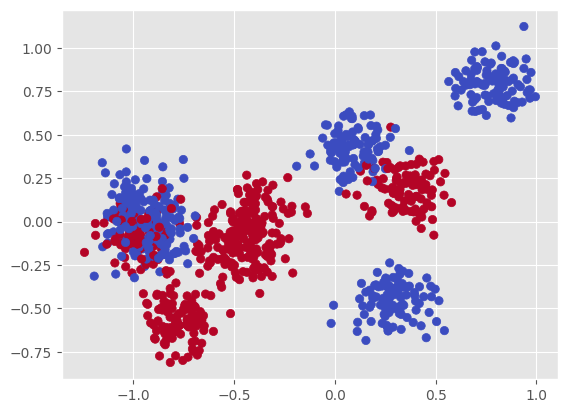

In [19]:
x, y = datasets.make_blobs( 
  n_samples=1000, center_box=(-1, 1), centers=10, cluster_std=0.1, random_state=3)
y %= 2

x1, x2 = x[:, 0], x[:, 1]
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')

In [23]:
# 실제로 전부 추정하려면 시간이 너무 오래 걸리므로 파라미터를 줄여서 확인

params = {
  'max_depth': [3, 5, 7, 9, 11, 13, 15],
  'objective': ['binary:hinge']
}

model = xgb.XGBClassifier()
search = GridSearchCV( model, param_grid=params, scoring='roc_auc', cv=5)
results = search.fit( x, y )

In [24]:
print( results.best_params_ )
best_model = results.best_estimator_

{'max_depth': 13, 'objective': 'binary:hinge'}


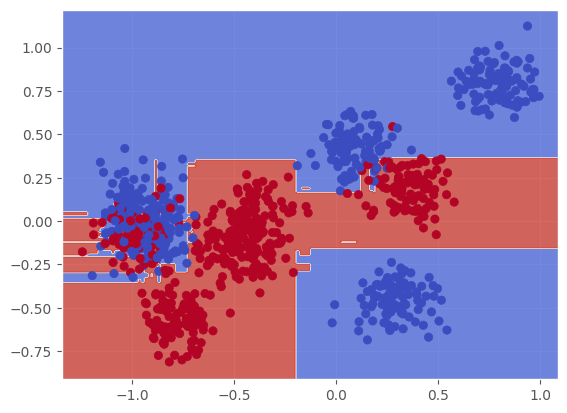

In [25]:
contours2D(best_model, x1, x2, cmap='coolwarm', alpha=0.8)
plt.scatter(x1, x2, c=y, cmap='coolwarm')
plt.show()

# 비지도학습

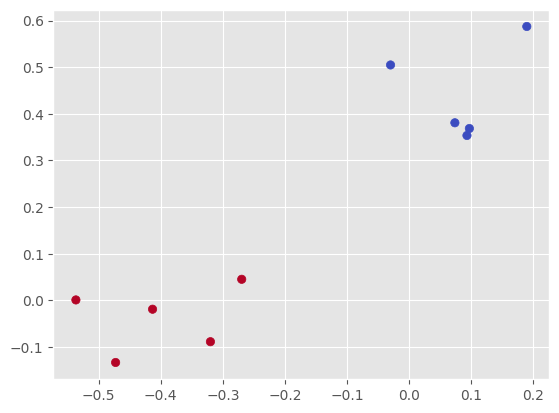

In [33]:
x, y = datasets.make_blobs( 
  n_samples=10, center_box=(-1, 1), centers=2, cluster_std=0.1, random_state=3)
y %= 2

x1, x2 = x[:, 0], x[:, 1]
plt.scatter( x[:, 0], x[:, 1], c=y, cmap='coolwarm')

## 계층적 군집 분석

### Agglomerative
- 계층적 군집화
  - K-Means의 단점을 보완한 방법
    - 노이즈(이상치)에 민감함
    - 초기에 주어지는 중심점의 위치에 따라서 결과가 달라진다.
    - k를 미리 알고 있어야 한다.
  - Agglomerative
    - K를 정하지 않아도 사용할 수 있다.
    - 초기 중심점을 사용하지 않기 때문에, 항상 동일한 결과
    - 시각화가 가능(어떻게 군집이 생성됐는지도 확인)
  - 가장 큰 단점은
    - 느려요
    - 자료가 아주 많은 경우에는 사용이 어렵다(계산 시간이 오래 걸림)
    - 샘플만 추출해서 전체적인 군집의 분포를 확인하는 용도로 사용이 가능

- 주요 파라미터
  - linkage: 가장 비슷한 클러스터를 측정하는 방법
    - 'ward', 'complete', 'average', 'single'
    - ward(기본값): 군집내의 분산을 가장 작게 하는 군집을 하나로 합치는 방법
    - complete: 군집들간의 거리가 가장 짧은 두 군집을 하나로 합치는 방법
    - average: 군집들 사이의 평균 거리가 가장 짧은 두 군집을 하나로 합치는 방법
  - linkage가 ward이면 affinity는 euclidean만 사용이 가능


In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [34]:
aggModel = AgglomerativeClustering(linkage='ward', affinity='euclidean').fit(x)

/opt/conda/envs/exam/lib/python3.7/site-packages/sklearn/utils/validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


왜 계층군집이라고 불리우는가?
- 초기에는 각각 포인트가 하나의 군집이 됩니다.
- 가장 가까운 두 군집들이 하나로 합쳐지면서 군집화가 진행

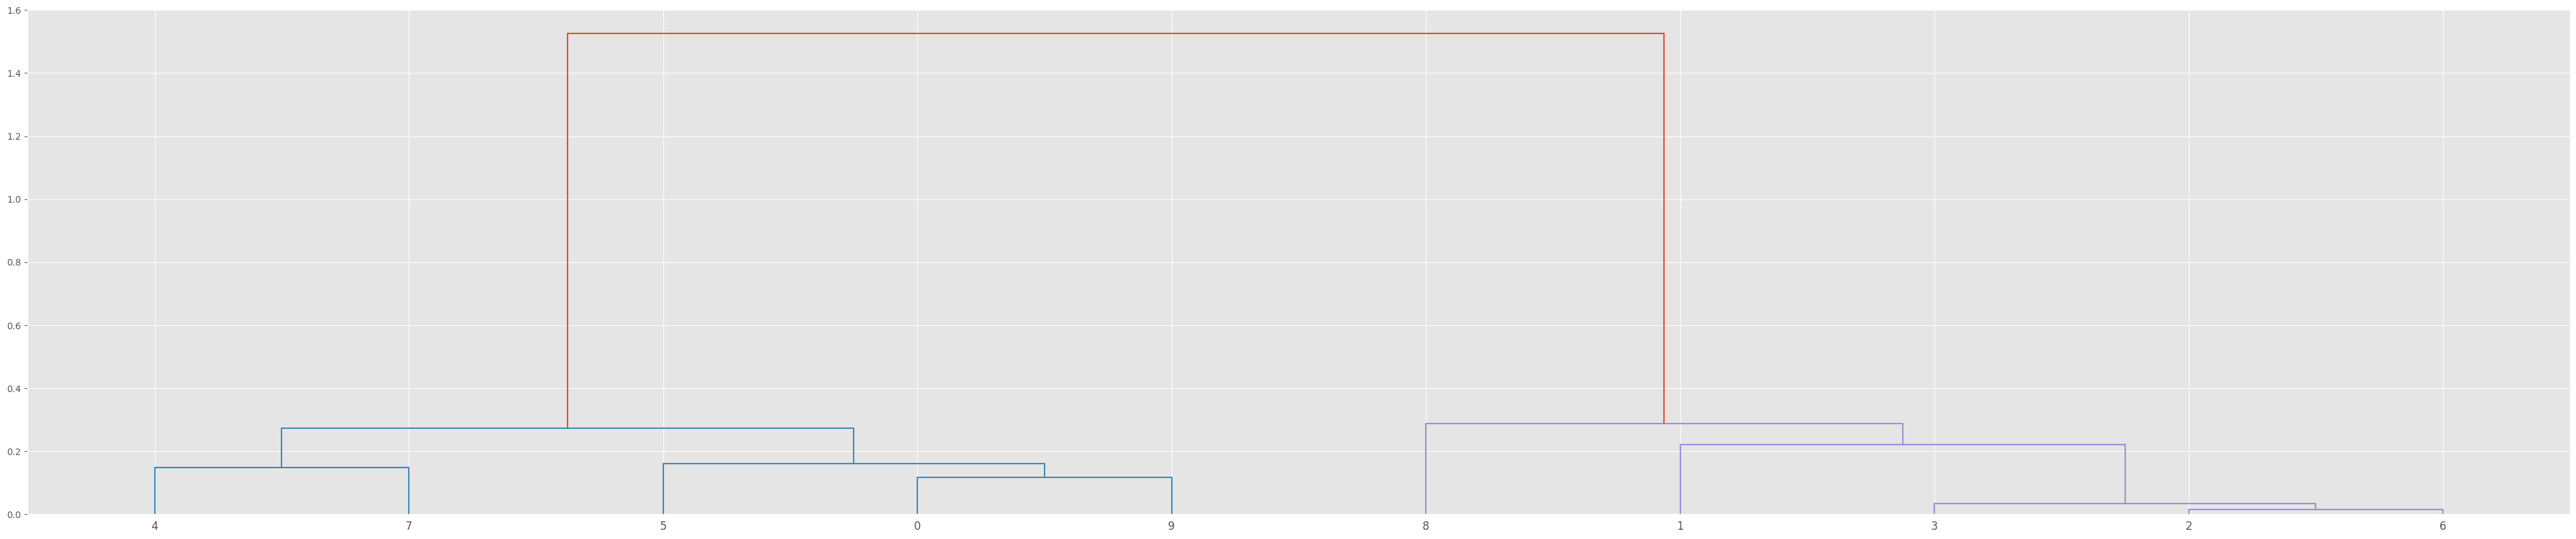

In [35]:
plt.figure( figsize=(50, 10))
faithful_linkage = ward(x)
dendrogram( faithful_linkage)
plt.show()

In [37]:
aggModel = AgglomerativeClustering( n_clusters=2, linkage='ward', affinity='euclidean').fit(x)
agg_labels = aggModel.fit_predict(x)

/opt/conda/envs/exam/lib/python3.7/site-packages/sklearn/utils/validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
/opt/conda/envs/exam/lib/python3.7/site-packages/sklearn/utils/validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


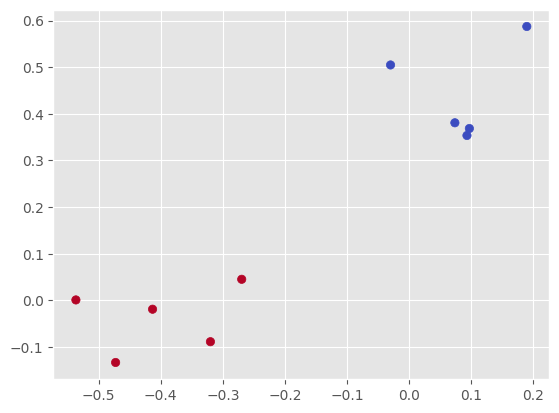

In [38]:
x, y = datasets.make_blobs( 
  n_samples=10, center_box=(-1, 1), centers=2, cluster_std=0.1, random_state=3)
y %= 2

x1, x2 = x[:, 0], x[:, 1]
plt.scatter( x[:, 0], x[:, 1], c=agg_labels, cmap='coolwarm')

## 밀도 기반 군집 분석

### DBSCAN
- Density-Based Spatial Clustering of Application with Noise
- 밀도를 기반으로 하는 클러스터링
- K를 몰라도 됩니다.
  - 군집의 개수를 미리 알고 있지 않아도 됩니다.
  - 높은 밀도의 그룹들을 군집화
  - 반경 epsilon내의 n개 이상의 점이 있으면, 하나의 군집으로 인식
  - 이때, 군집에 포함되지 못하는 자료들은 outlier가 됩니다. 
    - outlier detection 용도로 사용되는 경우도 있습니다. 

![](https://user-images.githubusercontent.com/53929665/103149384-39869380-47ac-11eb-8b8c-649036630985.png)

In [39]:
from sklearn.cluster import DBSCAN

In [62]:
dbscan = DBSCAN( eps=0.3, min_samples=3).fit(x)
db_labels = dbscan.fit_predict(x)

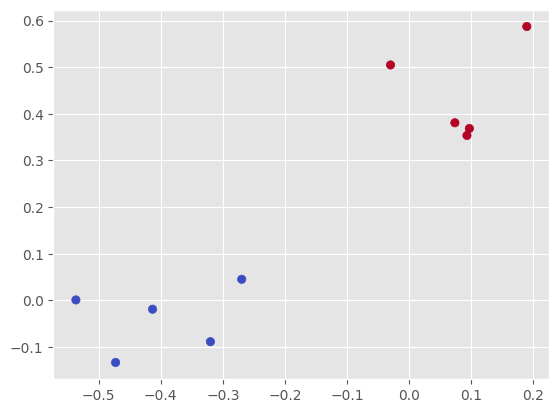

In [63]:
x, y = datasets.make_blobs( 
  n_samples=10, center_box=(-1, 1), centers=2, cluster_std=0.1, random_state=3)
y %= 2

x1, x2 = x[:, 0], x[:, 1]
plt.scatter( x[:, 0], x[:, 1], c=db_labels, cmap='coolwarm')